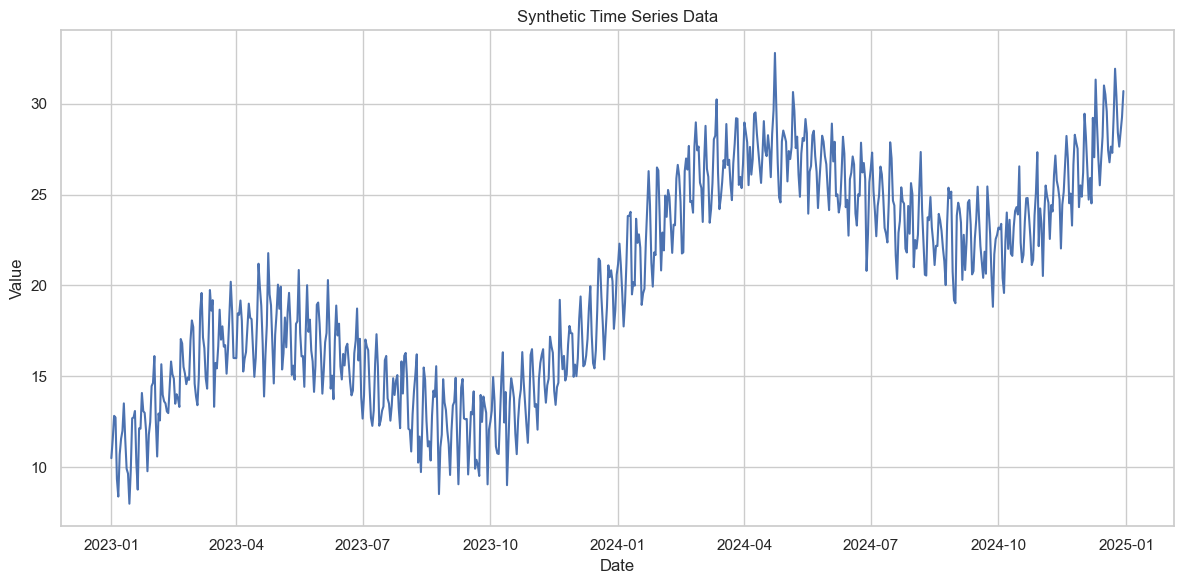

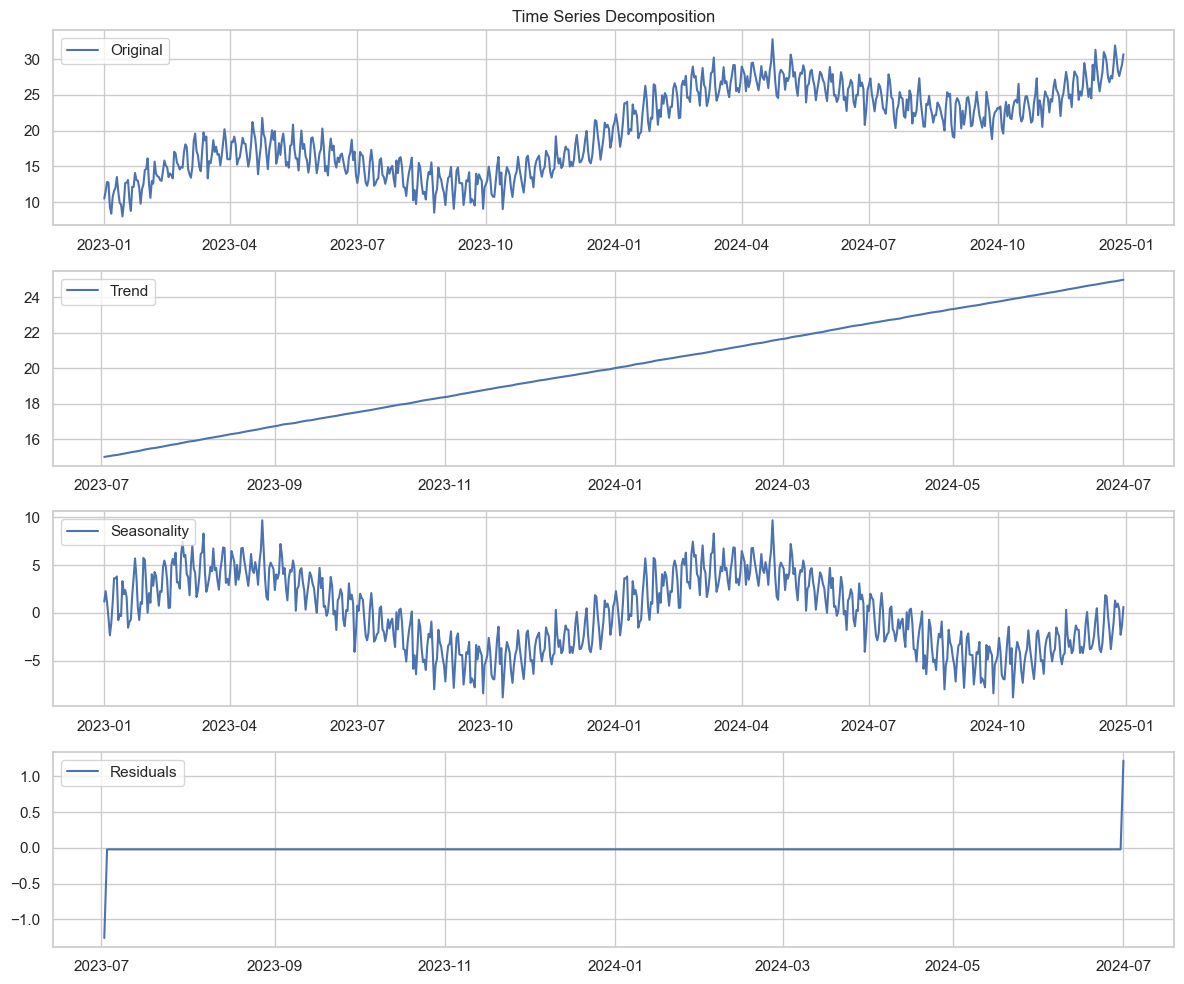

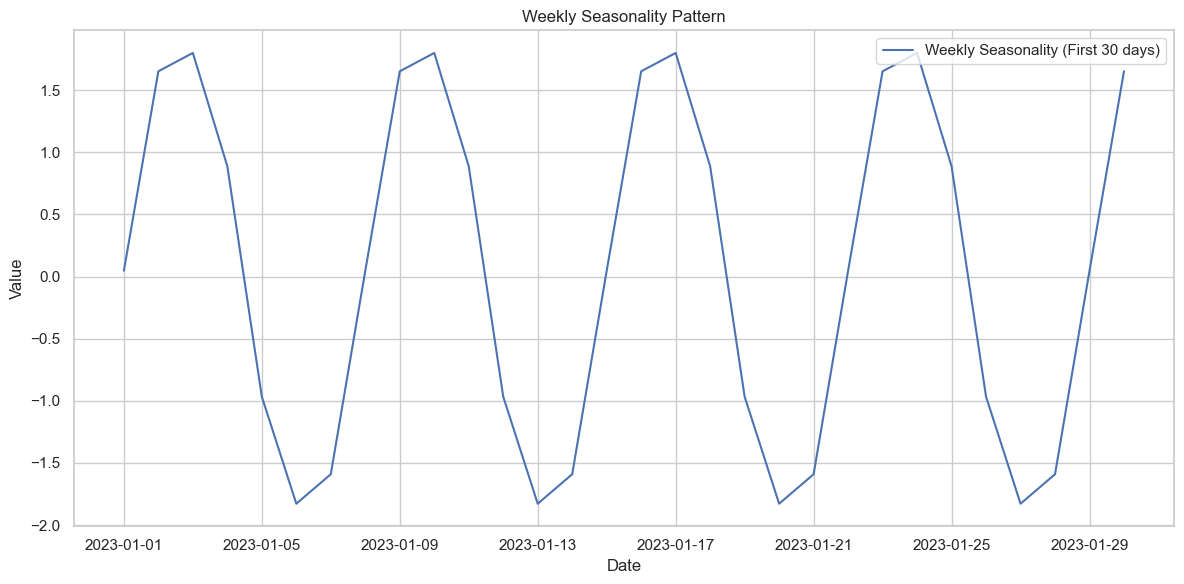

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Set styling
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 10)

# Generate synthetic time series data
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=365*2, freq='D')  # 2 years of daily data

# Create components
trend = np.linspace(10, 30, len(dates))  # Linear trend
seasonality = 5 * np.sin(2 * np.pi * np.arange(len(dates))/365)  # Yearly seasonality
weekly_pattern = 2 * np.sin(2 * np.pi * np.arange(len(dates))/7)  # Weekly pattern
irregular = np.random.normal(0, 1, len(dates))  # Random noise

# Combine components
ts = trend + seasonality + weekly_pattern + irregular

# Create DataFrame
df = pd.DataFrame({'date': dates, 'value': ts})
df.set_index('date', inplace=True)

# Plot original time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'])
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df['value'], model='additive', period=365)

# Plot decomposition
fig = plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(df.index, df['value'], label='Original')
plt.legend(loc='upper left')
plt.title('Time Series Decomposition')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Additional plot for weekly seasonality
weekly_decomp = seasonal_decompose(df['value'], model='additive', period=7)
plt.figure(figsize=(12, 6))
plt.plot(weekly_decomp.seasonal[:30], label='Weekly Seasonality (First 30 days)')
plt.title('Weekly Seasonality Pattern')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

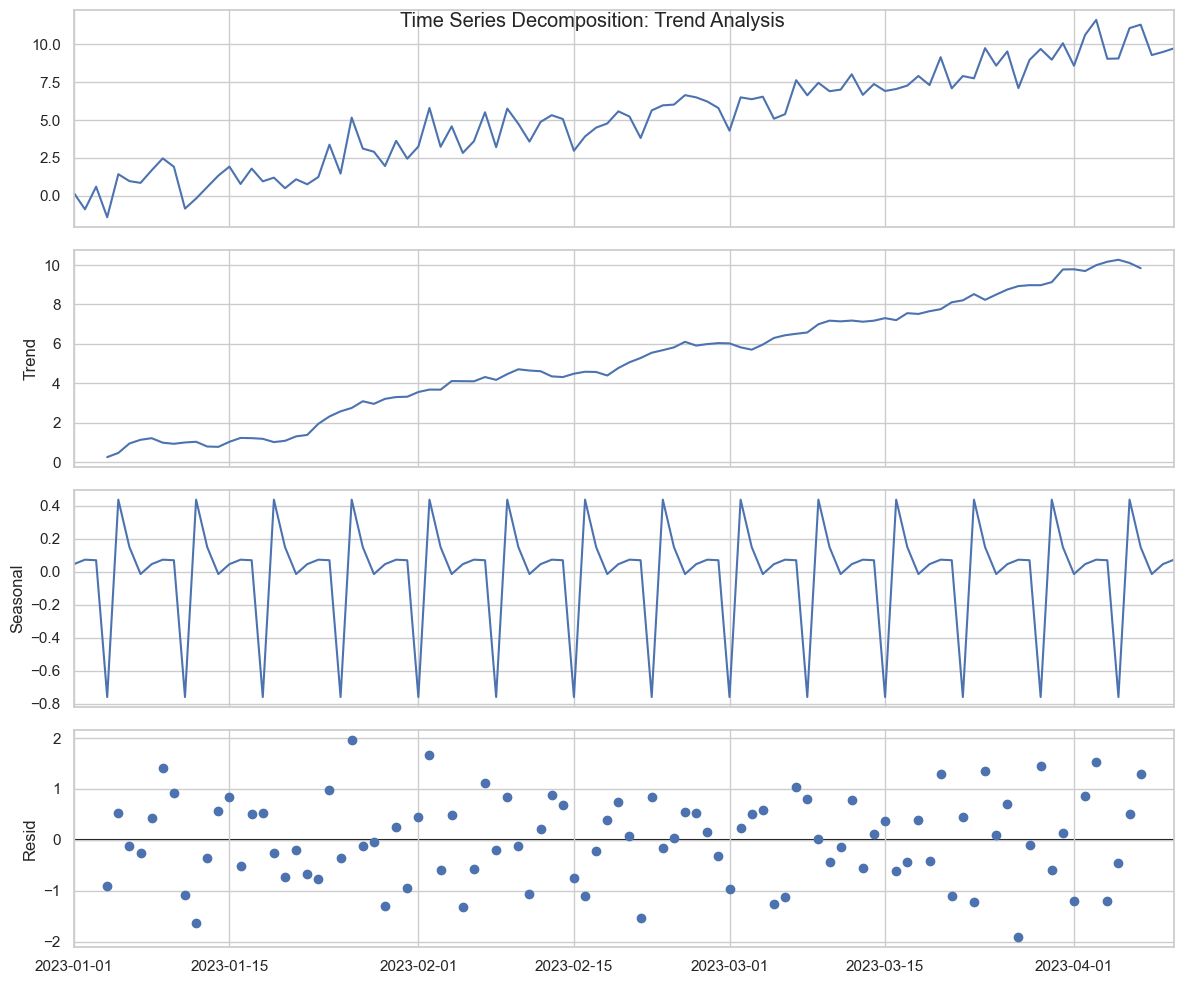

In [8]:
#1 Trend Analysis and Decomposition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#Generate synthetic data with trend
dates= pd.date_range(start='2023-01-01', periods=100, freq ='D')
trend =np.linspace(0, 10,100)
ts = pd.Series(trend + np.random.normal(0,1,100), index = dates)

#Decompose time series
result = seasonal_decompose(ts, model='additive', period =7)
result.plot();
plt.suptitle('Time Series Decomposition: Trend Analysis')
plt.show()

## Modify the tren slope and noise level to see different patterns

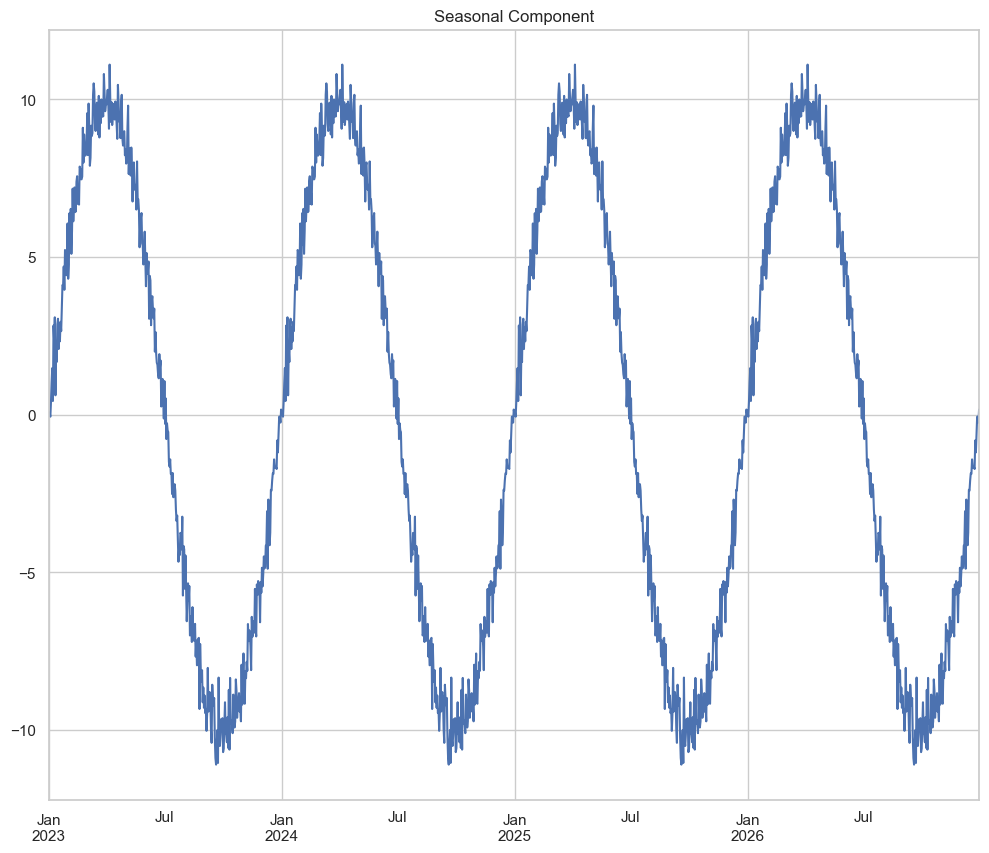

In [9]:
#2 Seasonality Identification
from statsmodels.tsa.seasonal import seasonal_decompose

# Create seasonal data
np.random.seed(42)
t = np.arange(1, 1461)
seasonal = 10 * np.sin(2 * np.pi * t / 365)
ts = pd.Series(seasonal + np.random.normal(0,1,1460),
              index =pd.date_range('2023-01-01', periods=1460, freq ='D'))

# Seasonal decomposition 
result = seasonal_decompose(ts, model='additive', period=365)
result.seasonal.plot(title='Seasonal Component');

## Modify the Sine wave parameters to create different seasonal patterns

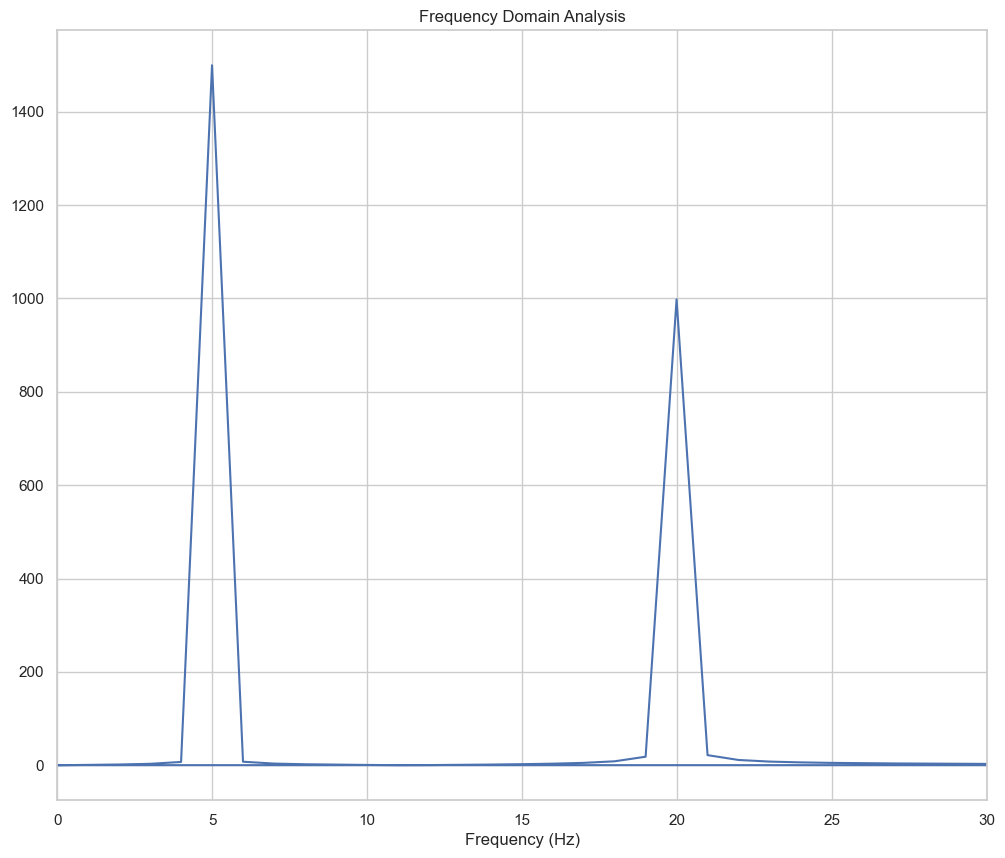

In [11]:
# 3 perodicity Detection using FFT
from scipy.fft import fft, fftfreq

# Generate signal with multiple frequencies
t = np.linspace(0,1,1000)
signal = 3*np.sin(2*np.pi*5*t) + 2*np.sin(2*np.pi*20*t)

# Perform FFT
yf = fft(signal)
xf = fftfreq(len(t), t[1]-t[0])

# Plot power spectrum
plt.plot(xf,np.abs(yf))
plt.title('Frequency Domain Analysis')
plt.xlabel('Frequency (Hz)')
plt.xlim(0,30);


## Add noise or new frequency components

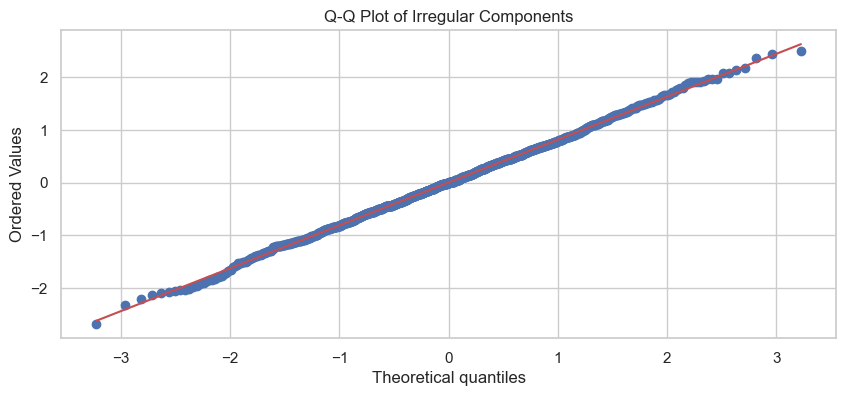

In [14]:
# 4 Irregular Component Analysis
from scipy.stats import probplot

#Get residuals from decomposition 
result = seasonal_decompose(ts, model='additive', period =365)
residuals = result.resid.dropna()

#Q-Q plot for normality check
plt.figure(figsize=(10,4))
probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Irregular Components');

## Test different distribution types

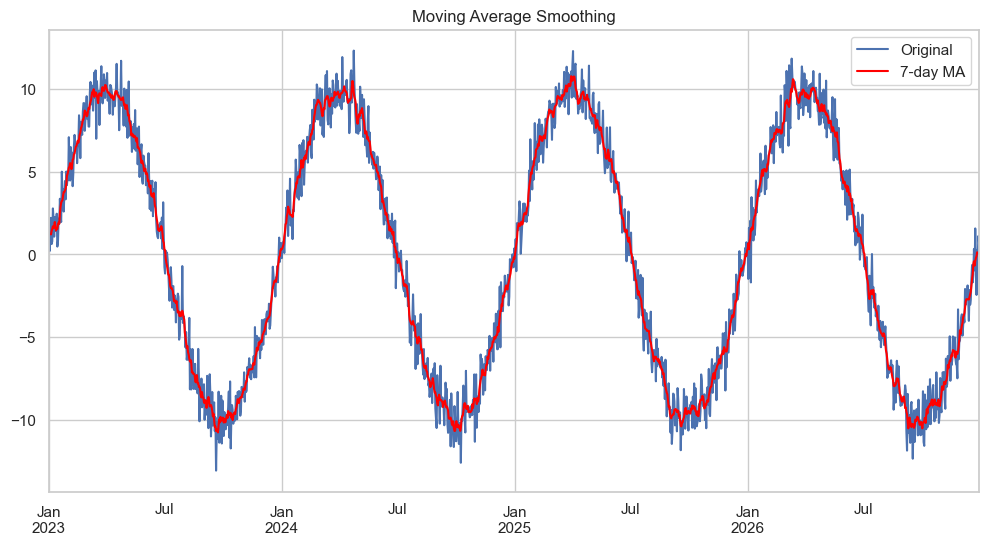

In [15]:
#5 Moving Average Smoothing
window_size =7
ts_ma = ts.rolling(window=window_size, center=True).mean()

plt.figure(figsize=(12,6))
ts.plot(label = 'Original')
ts_ma.plot(label=f'{window_size}-day MA', color='red')
plt.title('Moving Average Smoothing')
plt.legend();

In [16]:
ts.head()

2023-01-01    0.668848
2023-01-02    0.205952
2023-01-03    1.163885
2023-01-04    2.211054
2023-01-05    0.625495
Freq: D, dtype: float64

### Demonstrates noise reduction using moving averages

# Experiment with window sizes and edge effects

C:\ProgramData\anaconda31\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


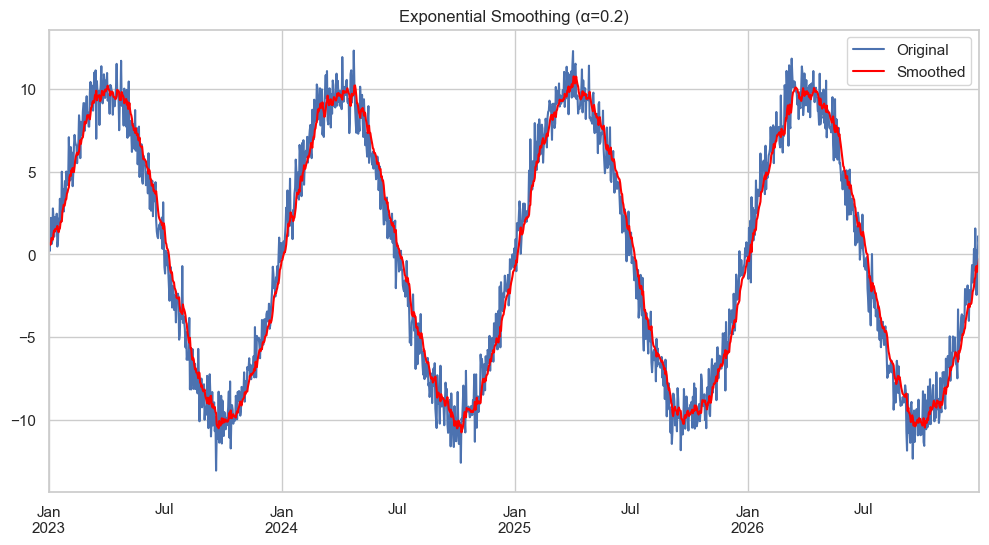

In [19]:
#6 Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(ts).fit(smoothing_level = 0.2)
forecast = model.forecast(30)

plt.figure(figsize=(12, 6))
ts.plot(label="Original")
model.fittedvalues.plot(label ="Smoothed", color='red')
plt.title('Exponential Smoothing (α=0.2)')
plt.legend();

###### Introduces basic exponential smoothing 

# Adjust α values to see smoothing effects.

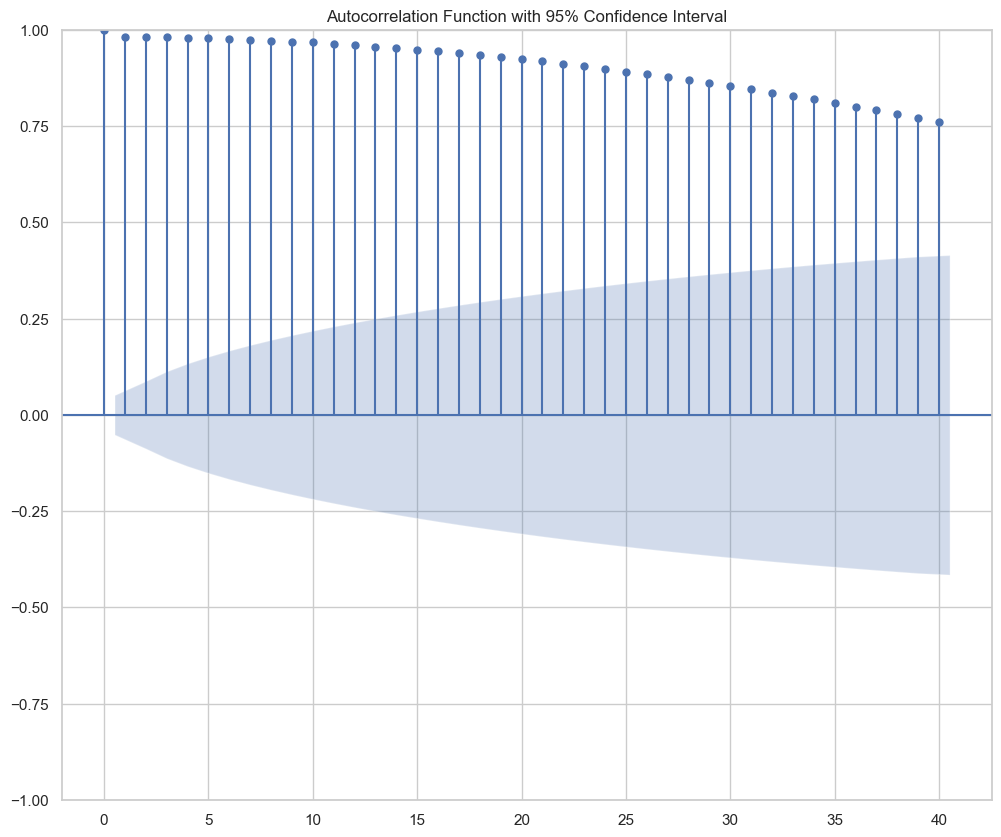

In [20]:
#7 Autocorrelation Function (ACF)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts, lags=40, alpha=0.05)
plt.title('Autocorrelation Function with 95% Confidence Interval');

##### Visualize autocorrelation structure

# Analyze different lag values and significance levels

In [21]:
# 8. Ljung-Box Test (Portmanteau Test)
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags =10, return_df= True)
print('Ljung_Box Test Results:\n', lb_test)

Ljung_Box Test Results:
       lb_stat  lb_pvalue
1    0.034731   0.852161
2    0.882871   0.643113
3    1.856350   0.602750
4    2.749802   0.600528
5    2.820952   0.727566
6    2.821173   0.830934
7    6.311926   0.503836
8   11.442016   0.177889
9   11.491907   0.243491
10  18.949560   0.040908


##### Tests residual whiteness

# Apply to different residual series to understand test sensitivity

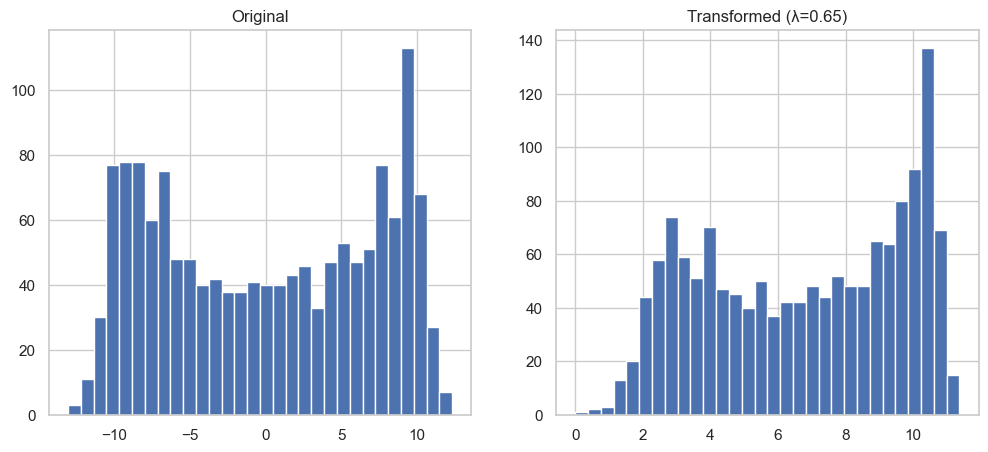

In [22]:
# 9 Box-Cox Transformation
from scipy.stats import boxcox

transformed, lambda_val = boxcox(ts + 1 - ts.min())  # Handle negative values
plt.figure(figsize=(12,5))
plt.subplot(121)
ts.hist(bins=30)
plt.title('Original')
plt.subplot(122)
pd.Series(transformed).hist(bins=30)
plt.title(f'Transformed (λ={lambda_val:.2f})');

##### Demonstrates variance stabilization.

# Compare different λ values and distribution changes.

   ---------------------------------------- 0.0/378.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/378.6 kB ? eta -:--:--
   -- ------------------------------------ 20.5/378.6 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/378.6 kB 262.6 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/378.6 kB 262.6 kB/s eta 0:00:02
   ------ -------------------------------- 61.4/378.6 kB 233.8 kB/s eta 0:00:02
   --------- ----------------------------- 92.2/378.6 kB 308.0 kB/s eta 0:00:01
   ---------- --------------------------- 102.4/378.6 kB 328.0 kB/s eta 0:00:01
   ---------- --------------------------- 102.4/378.6 kB 328.0 kB/s eta 0:00:01
   -------------- ----------------------- 143.4/378.6 kB 355.0 kB/s eta 0:00:01
   -------------------- ----------------- 204.8/378.6 kB 429.5 kB/s eta 0:00:01
   ----------------------- -------------- 235.5/378.6 kB 464.5 kB/s eta 0:00:01
   ----------------------- -------------- 235.5/378.6 kB 

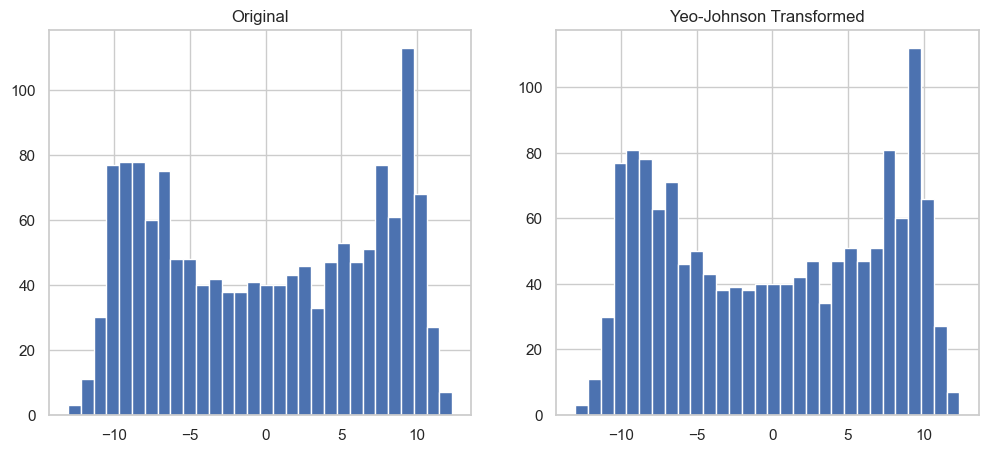

In [23]:
# 10. Yeo-Johnson Transformation
!pip install feature-engine
from feature_engine.transformation import YeoJohnsonTransformer

transformer = YeoJohnsonTransformer(variables=['value'])
df = pd.DataFrame({'value': ts.values})
transformed = transformer.fit_transform(df)

plt.figure(figsize=(12,5))
plt.subplot(121)
df['value'].hist(bins=30)
plt.title('Original')
plt.subplot(122)
transformed['value'].hist(bins=30)
plt.title('Yeo-Johnson Transformed');


##### Shows advanced transformation technique.

# Compare with Box-Cox results and handle negative values.

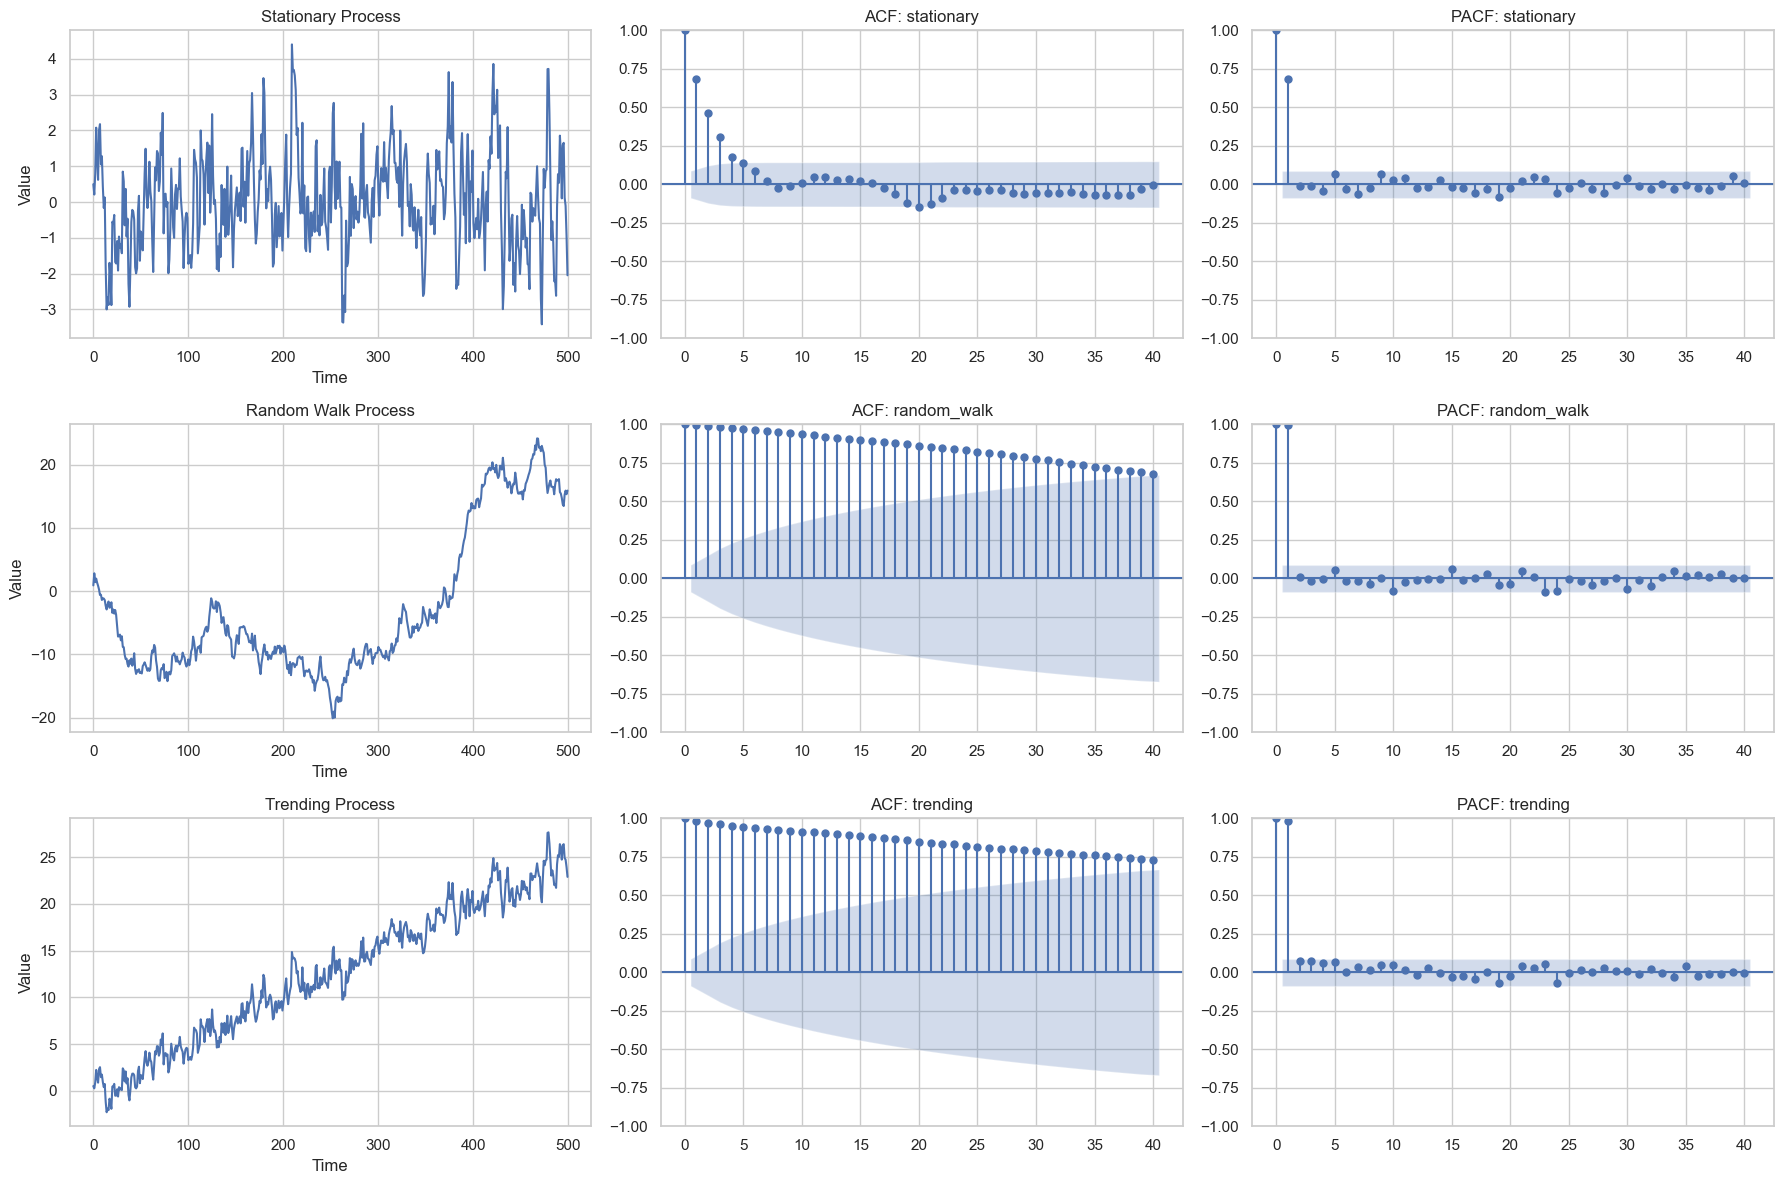


=== Stationarity Tests for stationary ===

Augmented Dickey-Fuller Test:
Test Statistic: -9.569757
p-value: 0.000000
Critical Values: {'1%': -3.4435228622952065, '5%': -2.867349510566146, '10%': -2.569864247011056}
Conclusion: Stationary

KPSS Test:
Test Statistic: 0.154522
p-value: 0.100000
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Stationary

=== Stationarity Tests for random_walk ===

Augmented Dickey-Fuller Test:
Test Statistic: -0.282015
p-value: 0.928013
Critical Values: {'1%': -3.4435228622952065, '5%': -2.867349510566146, '10%': -2.569864247011056}
Conclusion: Non-stationary

KPSS Test:
Test Statistic: 2.327090
p-value: 0.010000
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Non-stationary

=== Stationarity Tests for trending ===

Augmented Dickey-Fuller Test:
Test Statistic: -0.442416
p-value: 0.902772
Critical Values: {'1%': -3.4437936797256317, '5%': -2.867468682890213, '10%': -2.56992775946069

((-11.035010085083908,
  5.545429875798636e-20,
  9,
  489,
  {'1%': -3.4437936797256317,
   '5%': -2.867468682890213,
   '10%': -2.5699277594606915},
  1385.0112612772027),
 (0.027922960541109355,
  0.1,
  16,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.sm_exceptions import InterpolationWarning
import warnings

# Set style
sns.set(style="whitegrid")
np.random.seed(42)

# Generate synthetic data
n = 500

# Stationary: AR(1) with phi < 1
phi = 0.7
stationary_process = ArmaProcess([1, -phi], [1]).generate_sample(n)

# Non-stationary: Random walk
random_walk = np.cumsum(np.random.normal(0, 1, n))

# Trending non-stationary process
trend = 0.05 * np.arange(n)
trending_process = stationary_process + trend

# Combine into DataFrame
data = pd.DataFrame({
    'time': range(n),
    'stationary': stationary_process,
    'random_walk': random_walk,
    'trending': trending_process
})

# Visualization with ACF and PACF
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
series_names = ['stationary', 'random_walk', 'trending']

for i, col in enumerate(series_names):
    # Time series plot
    axes[i, 0].plot(data['time'], data[col])
    axes[i, 0].set_title(f'{col.replace("_", " ").title()} Process')
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Value')

    # ACF and PACF
    plot_acf(data[col], ax=axes[i, 1], lags=40, title=f'ACF: {col}')
    plot_pacf(data[col], ax=axes[i, 2], lags=40, title=f'PACF: {col}')

plt.tight_layout()
plt.show()

# Stationarity Testing Function
def stationarity_tests(series, series_name):
    print(f"\n=== Stationarity Tests for {series_name} ===")

    # ADF Test
    adf_result = adfuller(series, autolag='AIC')
    print("\nAugmented Dickey-Fuller Test:")
    print(f"Test Statistic: {adf_result[0]:.6f}")
    print(f"p-value: {adf_result[1]:.6f}")
    print(f"Critical Values: {adf_result[4]}")
    print("Conclusion:", "Stationary" if adf_result[1] < 0.05 else "Non-stationary")

    # KPSS Test
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=InterpolationWarning)
        kpss_result = kpss(series, regression='c', nlags='auto')

    print("\nKPSS Test:")
    print(f"Test Statistic: {kpss_result[0]:.6f}")
    print(f"p-value: {kpss_result[1]:.6f}")
    print(f"Critical Values: {kpss_result[3]}")
    print("Conclusion:", "Stationary" if kpss_result[1] > 0.05 else "Non-stationary")

    return adf_result, kpss_result

# Run tests on original series
for col in series_names:
    stationarity_tests(data[col], col)

# Differencing
print("\n=== After First Differencing ===")
diff_random_walk = data['random_walk'].diff().dropna()
diff_trending = data['trending'].diff().dropna()

stationarity_tests(diff_random_walk, 'Differenced Random Walk')
stationarity_tests(diff_trending, 'Differenced Trending Process')

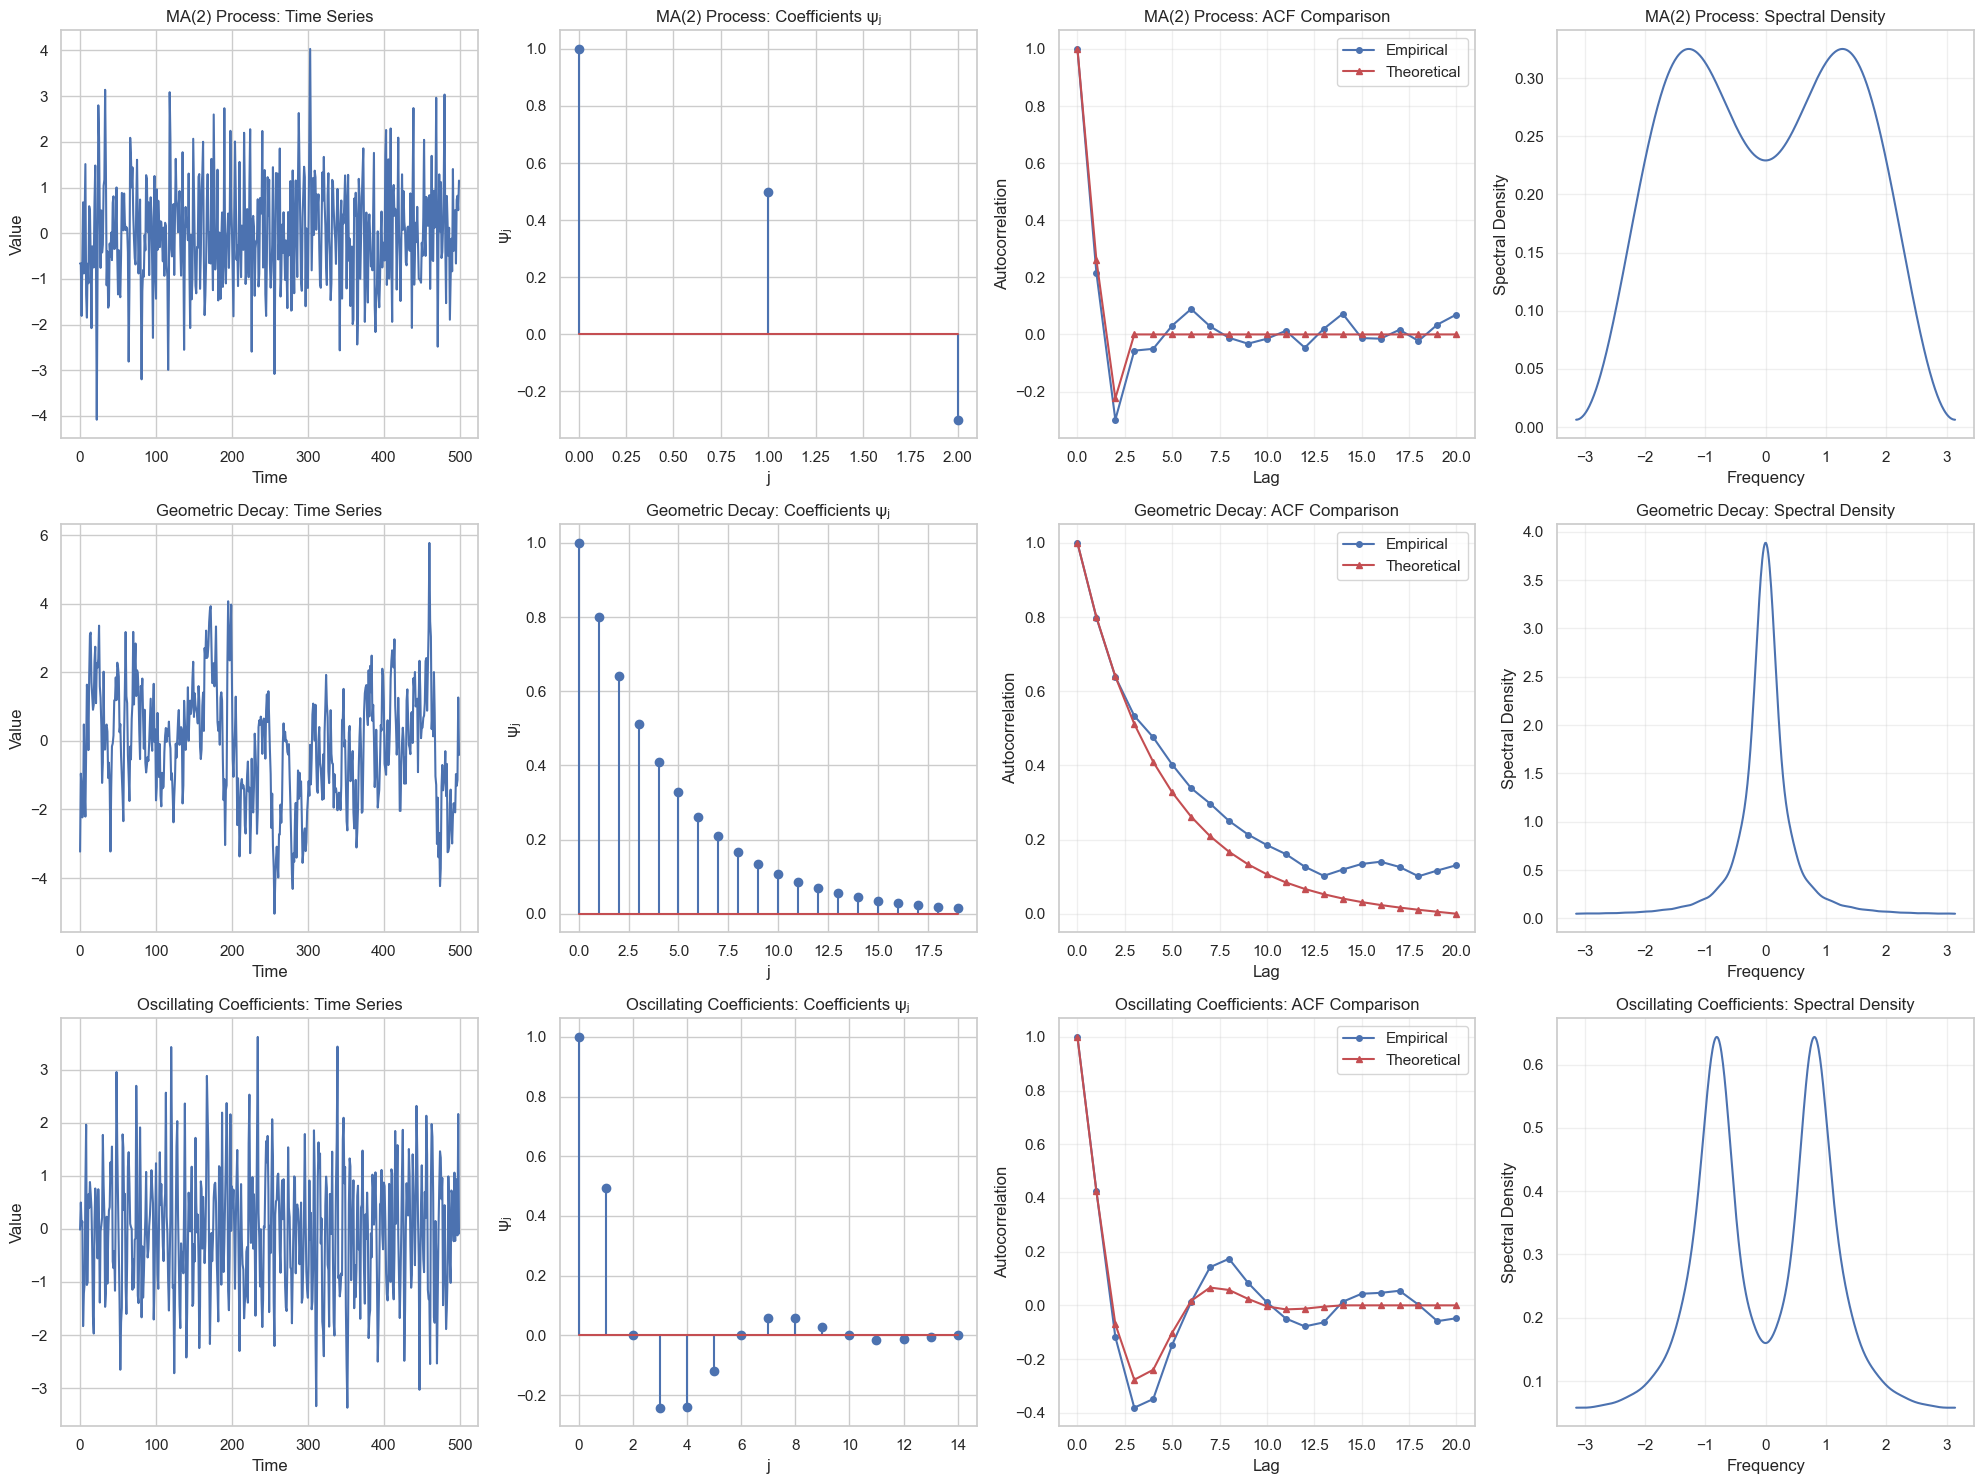

=== Linear Process Analysis ===

MA(2) Process:
Process variance: 1.2589
Theoretical variance: 1.3400
Number of significant coefficients: 3
Coefficient decay rate: 0.3000

Geometric Decay:
Process variance: 2.8738
Theoretical variance: 2.7774
Number of significant coefficients: 20
Coefficient decay rate: 0.0144

Oscillating Coefficients:
Process variance: 1.3618
Theoretical variance: 1.3836
Number of significant coefficients: 10
Coefficient decay rate: 0.0000


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
import seaborn as sns

class LinearProcess:
    """Class for generating and analyzing linear processes"""

    def __init__(self, psi_coefficients, sigma=1, mu=0):
        """
        Initialize linear process

        Parameters:
        psi_coefficients: array-like, linear process coefficients
        sigma: float, innovation standard deviation
        mu: float, process mean
        """
        self.psi = np.array(psi_coefficients)
        self.sigma = sigma
        self.mu = mu

    def generate_sample(self, n_obs, n_burn=1000):
        """Generate sample from linear process"""
        total_n = n_obs + n_burn

        # Generate innovations
        innovations = np.random.normal(0, self.sigma, total_n + len(self.psi))

        # Generate linear process
        y = np.zeros(total_n)
        for t in range(total_n):
            y[t] = self.mu + np.sum(self.psi * innovations[t:t+len(self.psi)][::-1])

        return y[n_burn:]  # Remove burn-in period

    def theoretical_acf(self, max_lag):
        """Calculate theoretical autocovariance function"""
        gamma = np.zeros(max_lag + 1)
        for k in range(max_lag + 1):
            if k == 0:
                gamma[k] = self.sigma**2 * np.sum(self.psi**2)
            else:
                valid_indices = np.arange(len(self.psi) - k)
                gamma[k] = self.sigma**2 * np.sum(self.psi[valid_indices] * self.psi[valid_indices + k])

        # Convert to correlation
        rho = gamma / gamma[0]
        return rho

    def spectral_density(self, frequencies):
        """Calculate theoretical spectral density"""
        # Transfer function evaluation
        transfer_func = np.zeros(len(frequencies), dtype=complex)
        for j, psi_j in enumerate(self.psi):
            transfer_func += psi_j * np.exp(-1j * j * frequencies)

        # Spectral density
        spectral_density = (self.sigma**2 / (2 * np.pi)) * np.abs(transfer_func)**2
        return spectral_density

# Example 1: MA(2) process
ma2_coeffs = [1, 0.5, -0.3]  # psi_0 = 1, psi_1 = 0.5, psi_2 = -0.3
ma2_process = LinearProcess(ma2_coeffs, sigma=1)

# Example 2: Infinite MA process (geometric decay)
geometric_coeffs = [0.8**j for j in range(20)]  # Truncated infinite series
geom_process = LinearProcess(geometric_coeffs, sigma=1)

# Example 3: Oscillating coefficients
n_coeffs = 15
oscillating_coeffs = [(0.7**j) * np.cos(j * np.pi / 4) for j in range(n_coeffs)]
osc_process = LinearProcess(oscillating_coeffs, sigma=1)

# Generate samples
n_obs = 500
ma2_data = ma2_process.generate_sample(n_obs)
geom_data = geom_process.generate_sample(n_obs)
osc_data = osc_process.generate_sample(n_obs)

# Create comprehensive visualization
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

processes = [
    (ma2_data, ma2_process, "MA(2) Process"),
    (geom_data, geom_process, "Geometric Decay"),
    (osc_data, osc_process, "Oscillating Coefficients")
]

for i, (data, process, title) in enumerate(processes):
    # Time series plot
    axes[i, 0].plot(data)
    axes[i, 0].set_title(f'{title}: Time Series')
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Value')

    # Coefficients plot
    axes[i, 1].stem(range(len(process.psi)), process.psi)
    axes[i, 1].set_title(f'{title}: Coefficients ψⱼ')
    axes[i, 1].set_xlabel('j')
    axes[i, 1].set_ylabel('ψⱼ')

    # ACF comparison
    empirical_acf = acf(data, nlags=20)
    theoretical_acf = process.theoretical_acf(20)

    lags = range(21)
    axes[i, 2].plot(lags, empirical_acf, 'bo-', label='Empirical', markersize=4)
    axes[i, 2].plot(lags, theoretical_acf, 'r^-', label='Theoretical', markersize=4)
    axes[i, 2].set_title(f'{title}: ACF Comparison')
    axes[i, 2].set_xlabel('Lag')
    axes[i, 2].set_ylabel('Autocorrelation')
    axes[i, 2].legend()
    axes[i, 2].grid(True, alpha=0.3)

    # Spectral density
    frequencies = np.linspace(-np.pi, np.pi, 512)
    spec_density = process.spectral_density(frequencies)

    axes[i, 3].plot(frequencies, spec_density)
    axes[i, 3].set_title(f'{title}: Spectral Density')
    axes[i, 3].set_xlabel('Frequency')
    axes[i, 3].set_ylabel('Spectral Density')
    axes[i, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Demonstrate Wold decomposition concept
print("=== Linear Process Analysis ===")
for i, (data, process, title) in enumerate(processes):
    print(f"\n{title}:")
    print(f"Process variance: {np.var(data):.4f}")
    print(f"Theoretical variance: {process.sigma**2 * np.sum(process.psi**2):.4f}")
    print(f"Number of significant coefficients: {np.sum(np.abs(process.psi) > 0.01)}")
    print(f"Coefficient decay rate: {np.abs(process.psi[-1]/process.psi[0]):.4f}")
